# TRAFFIC SIGN RECOGNITION PROJECT

---



### 1) Downloading the dataset
Intro

1.   Multi-class classification problem
2.   More than 40 classes
3.   More than 50,000 images in total
4.   Large, lifelike database

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

# 2) Understanding the data and preprocessing 

CLASS LABELS SCREENSHOT ADDED FOR REFERENCE BELOW

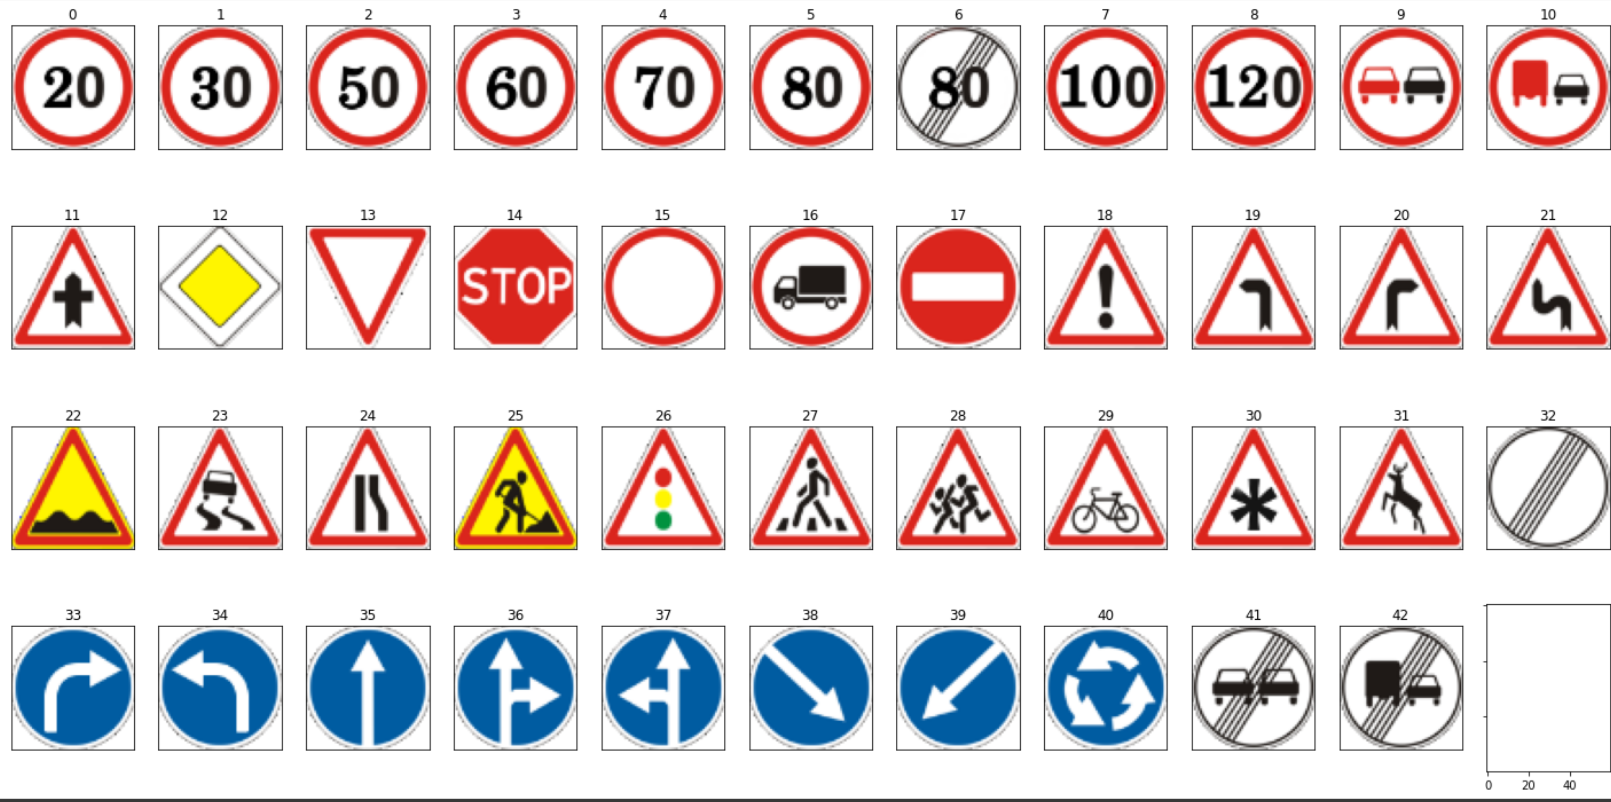

In [2]:
## Importing required libraries for pre-processing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import seaborn as sns

In [3]:
imgs_path = "./Train"
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((30,30))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)

In [4]:
# checking exactly how the data is going to be appended
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(39209, 30, 30, 3)


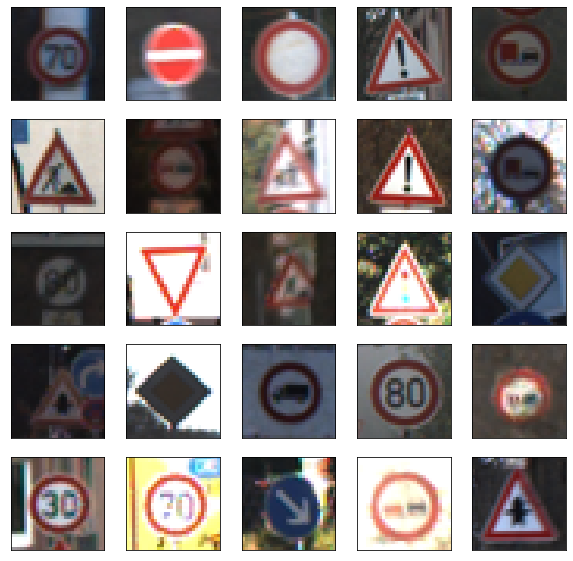

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(39209)], cmap=plt.cm.binary)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


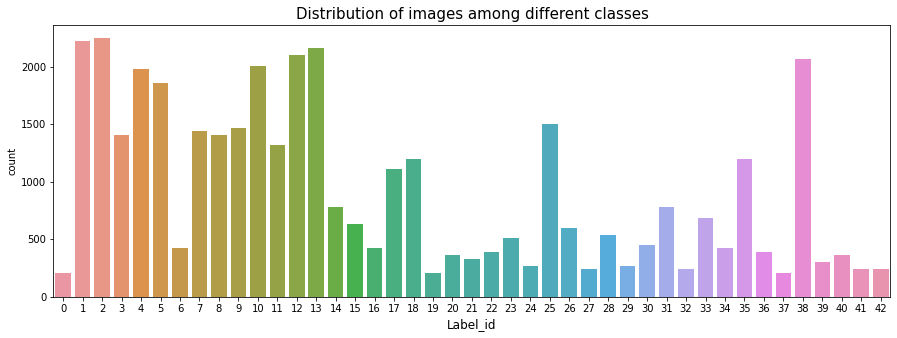

In [6]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(labels)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

## 3) SPLITTING THE DATA

In [21]:
# import train_test_split
from sklearn.model_selection import train_test_split

print(data.shape)
 
X_train,X_test,y_train,y_test  =  train_test_split(data,labels,test_size=0.2,random_state = 0)
print(X_train.shape,X_test.shape)

(39209, 30, 30, 3)
(31367, 30, 30, 3) (7842, 30, 30, 3)


## 4) ONE HOT ENCODING

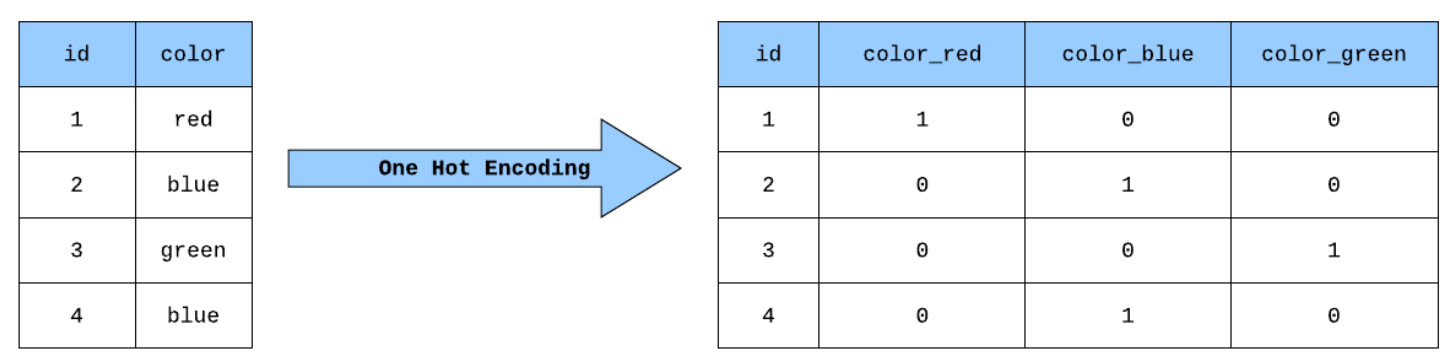


Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
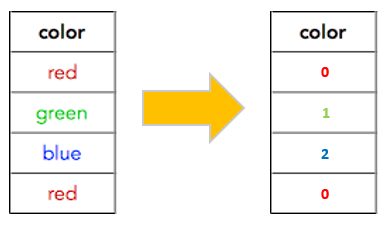
---



In [22]:
# importing to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

# 5) BUILDING CNN MODEL
## Architecture will be like
## 1) Block 1:
##   ---- 2 convolutional layers with 32 filters each and kernel size 5x5
##   ---- maxpool layer 2x2
## 2) Dropout 25% nodes
## 3) Block 2:
##   ---- 2 convolutional layers with 64 filters each and kernel size 3x3
##   ---- maxpool layer 2x2
## 3) Dropout 25% nodes
## 4) Flatten them to convert 2D data to 1D data
## 5) Now we can do further processing using NN (Fully Connected layer)
##   ---- input layer of 256 nodes
##   ---- Dropout 50% nodes
##   ---- output layer of 43 nodes

In [23]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential

cnn_model = Sequential()
# block 1
cnn_model.add(Conv2D(filters=32,kernel_size = (5,5), activation = "relu", input_shape = X_train.shape[1:]))
cnn_model.add(Conv2D(filters=32,kernel_size = (5,5), activation = "relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))
# block 2
cnn_model.add(Conv2D(filters=64,kernel_size = (3,3), activation = "relu"))
cnn_model.add(Conv2D(filters=64,kernel_size = (3,3), activation = "relu"))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
# block 3
cnn_model.add(Dense(256,activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(43,activation="softmax"))

# 6) COMPILING THE MODEL

In [24]:
cnn_model.compile(loss="categorical_crossentropy",optimizer="adam",metrics= ["accuracy"])

In [25]:
epochs =15
history_cnn = cnn_model.fit(X_train,y_train,batch_size=32,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/15
981/981 [==============================] - 124s 126ms/step - loss: 2.1653 - accuracy: 0.4303 - val_loss: 0.7512 - val_accuracy: 0.7998
Epoch 2/15
981/981 [==============================] - 125s 127ms/step - loss: 1.0175 - accuracy: 0.6946 - val_loss: 0.4973 - val_accuracy: 0.8776
Epoch 3/15
981/981 [==============================] - 125s 128ms/step - loss: 0.7456 - accuracy: 0.7742 - val_loss: 0.2846 - val_accuracy: 0.9198
Epoch 4/15
981/981 [==============================] - 126s 128ms/step - loss: 0.5416 - accuracy: 0.8365 - val_loss: 0.1846 - val_accuracy: 0.9457
Epoch 5/15
981/981 [==============================] - 126s 128ms/step - loss: 0.4234 - accuracy: 0.8731 - val_loss: 0.1563 - val_accuracy: 0.9541
Epoch 6/15
981/981 [==============================] - 126s 128ms/step - loss: 0.3211 - accuracy: 0.9034 - val_loss: 0.1285 - val_accuracy: 0.9635
Epoch 7/15
981/981 [==============================] - 125s 128ms/step - loss: 0.3098 - accuracy: 0.9104 - val_loss: 0.1318 -

In [28]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)         

# 7) PLOTTING GRAPHS SO AS TO COMAPRE THE ACCURACY OF TRAINING AND VALIDATING DATA

Text(0.5, 1.0, 'ACCURACY USING cnn')

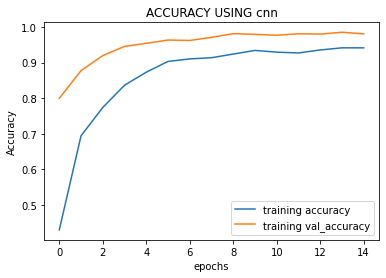

In [29]:
plt.figure(0)
plt.plot(history_cnn.history["accuracy"],label="training accuracy")
plt.plot(history_cnn.history["val_accuracy"],label="training val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ACCURACY USING cnn")

Text(0.5, 1.0, 'loss USING cnn')

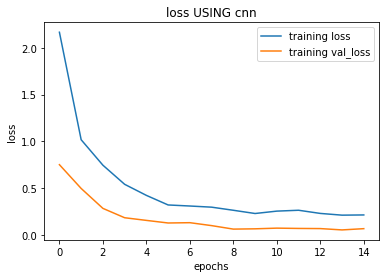

In [30]:
plt.figure(0)
plt.plot(history_cnn.history["loss"],label="training loss")
plt.plot(history_cnn.history["val_loss"],label="training val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("loss USING cnn")

# 8) Making predictions on unseen data

In [32]:
#testing accuracy on test dataset

y_test_data = pd.read_csv("Test.csv")

labels= y_test_data["ClassId"].values
imgs = y_test_data["Path"].values

data_set = []

for img in imgs:
  image = Image.open(img)
  image = image.resize((30,30))
  data_set.append(np.array(image))

In [33]:
X_data_test = np.array(data_set)


In [35]:
prediction = cnn_model.predict(X_data_test)
classes_x = np.argmax(prediction,axis=1)

In [36]:
from sklearn.metrics import accuracy_score
# Here we will be getting the accuracy on testing data set
print(accuracy_score(labels,classes_x))

0.9481393507521774


# 9) Let us randomly select data from test_data_set and see about the predictions

2


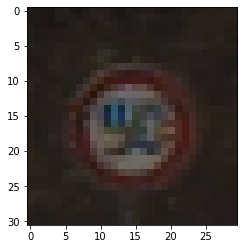

In [38]:
n = np.random.randint(0,1000)
im = Image.open(imgs[n])
plt.imshow(im)
print(classes_x[n])

Let us compare

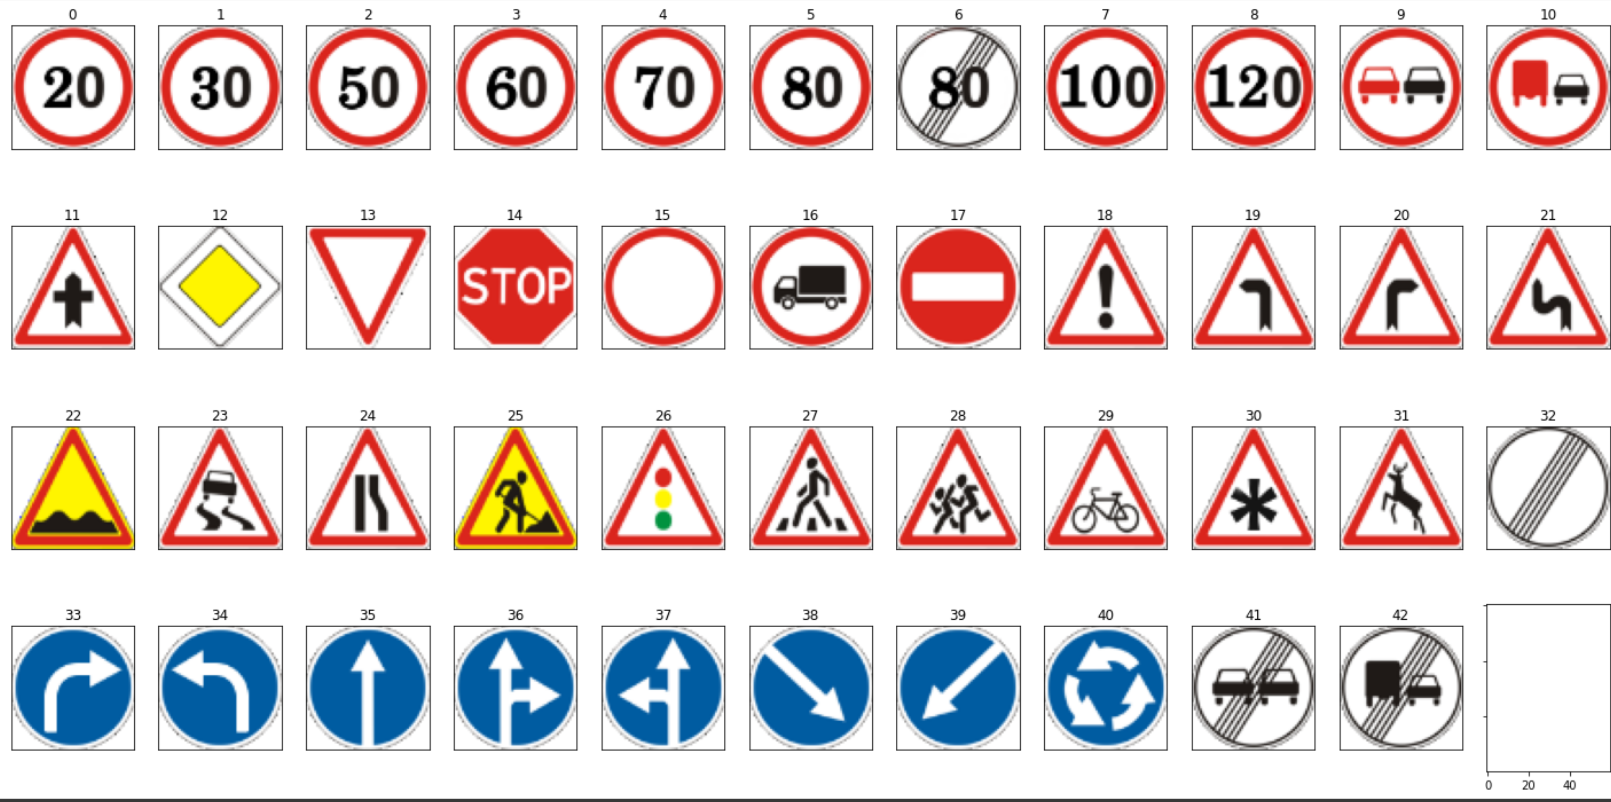